In [1]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('xport_dataframe.csv')
data.head(10)

,time,infections
0,1,1
1,2,1
2,3,1
3,4,2
4,5,3
5,6,3
6,7,3
7,8,3
8,9,3
9,10,3


Apply log transformation to the number of infections¶


In [3]:
data['logInfections'] = np.log(data.infections)
data.head(10)

,time,infections,logInfections
0,1,1,0.000000
1,2,1,0.000000
2,3,1,0.000000
3,4,2,0.693147
4,5,3,1.098612
5,6,3,1.098612
6,7,3,1.098612
7,8,3,1.098612
8,9,3,1.098612
9,10,3,1.098612


Statsmodels Linear Regression¶


In [4]:
X = data.time
X = sm.add_constant(X)

c:\users\sumukh\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [5]:
y = data.logInfections


In [6]:
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          logInfections   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     510.7
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           6.40e-32
Time:                        01:12:00   Log-Likelihood:                -78.113
No. Observations:                  65   AIC:                             160.2
Df Residuals:                      63   BIC:                             164.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9043      0.205     -4.408      0.0

In [7]:
np.exp(-0.9043)

0.40482516355848314

In [8]:
np.exp(0.1221)

1.1298670828394555

In [9]:
def linear_predictions(t):
    return np.exp(-0.9043) * np.exp(0.1221) ** t

In [10]:
data['Predictions'] = data.time.apply(linear_predictions)
data.head(10)

,time,infections,logInfections,Predictions
0,1,1,0.000000,0.457399
1,2,1,0.000000,0.516800
2,3,1,0.000000,0.583915
3,4,2,0.693147,0.659746
4,5,3,1.098612,0.745426
5,6,3,1.098612,0.842232
6,7,3,1.098612,0.951610
7,8,3,1.098612,1.075193
8,9,3,1.098612,1.214825
9,10,3,1.098612,1.372591


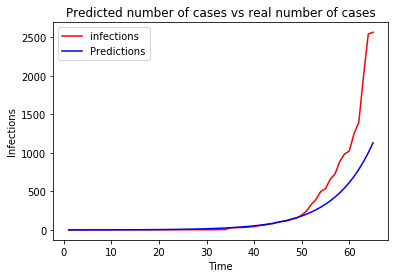

In [11]:
plt.plot(data.time, data.infections, 'red')
plt.plot(data.time, data.Predictions, 'blue')
plt.title('Predicted number of cases vs real number of cases')
plt.xlabel('Time')
plt.ylabel('Infections')
plt.legend()

In [12]:
a = np.exp(-0.9043)
b = np.exp(0.1221)

In [18]:
def prediction(day):
    
    d = b**day
    c = a*d
    return(c)
    

In [19]:
prediction(70)

2085.3667123695245